In [1]:
%cd libraries
import LOTlib3

/Users/meilongzhang/knightlab/codet5/libraries


In [2]:
import os
print(os.getcwd())

/Users/meilongzhang/knightlab/codet5/libraries


In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [29]:
from random import sample
from random import randrange
from random import choices

In [7]:
import json

In [8]:
from LOTlib3.Hypotheses.LOTHypothesis import LOTHypothesis
from LOTlib3.DataAndObjects import FunctionData, Obj

In [9]:
from LOTlib3.DefaultGrammars import DNF
from LOTlib3.Miscellaneous import q, random
from LOTlib3.Grammar import Grammar

In [10]:
DEFAULT_FEATURE_WEIGHT = 5
grammar = Grammar()
grammar.add_rule('START', '', ['DISJ'], 1.0)
grammar.add_rule('START', '', ['PRE-PREDICATE'], DEFAULT_FEATURE_WEIGHT)
grammar.add_rule('START', 'True', None, DEFAULT_FEATURE_WEIGHT)
grammar.add_rule('START', 'False', None, DEFAULT_FEATURE_WEIGHT)

grammar.add_rule('DISJ', '',     ['CONJ'], 1.0)
grammar.add_rule('DISJ', '',     ['PRE-PREDICATE'], DEFAULT_FEATURE_WEIGHT)
grammar.add_rule('DISJ', '(%s or %s)',  ['PRE-PREDICATE', 'DISJ'], 1.0)

grammar.add_rule('CONJ', '',     ['PRE-PREDICATE'], DEFAULT_FEATURE_WEIGHT)
grammar.add_rule('CONJ', '(%s and %s)', ['PRE-PREDICATE', 'CONJ'], 1.0)

# A pre-predicate is how we treat negation
grammar.add_rule('PRE-PREDICATE', 'not (%s)', ['PREDICATE'], DEFAULT_FEATURE_WEIGHT)
grammar.add_rule('PRE-PREDICATE', '',     ['PREDICATE'], DEFAULT_FEATURE_WEIGHT)

PRE-PREDICATE -> ['PREDICATE']	w/ p=5.0

In [11]:
#grammar.add_rule('PREDICATE', 'is_color_', ['x', 'COLOR'], 1.0)
#grammar.add_rule('PREDICATE', 'is_shape_', ['x', 'SHAPE'], 1.0)
grammar.add_rule('PREDICATE', "x['color']==%s", ['COLOR'], 1.0)
grammar.add_rule('PREDICATE', "x['shape']==%s", ['SHAPE'], 1.0)

# Some colors/shapes each (for this simple demo)
# These are written in quotes so they can be evaled
grammar.add_rule('COLOR', q('red'), None, 1.0)
grammar.add_rule('COLOR', q('blue'), None, 1.0)
grammar.add_rule('COLOR', q('green'), None, 1.0)


grammar.add_rule('SHAPE', q('square'), None, 1.0)
grammar.add_rule('SHAPE', q('circle'), None, 1.0)
grammar.add_rule('SHAPE', q('triangle'), None, 1.0)

SHAPE -> 'triangle'	w/ p=1.0

In [12]:
rules = {i: set() for i in range(15)}
for _ in range(100000):
    #rule = grammar.generate()
    #log_prob = grammar.log_probability(rule)
    rule = LOTHypothesis(grammar=grammar)
    depth = rule.value.depth() #rule.depth()
    rules[depth].add(rule)

In [13]:
rules = {depth: list(depth_rules) for depth, depth_rules in rules.items()}

In [14]:
colors = ['red', 'blue', 'green']
shapes = ['circle', 'square', 'triangle']
all_stimuli = []

for color in colors:
    for shape in shapes:
        all_stimuli.append({'shape':shape, 'color':color})

In [15]:
for stim in all_stimuli:
    result = test(stim)
    print(stim, result)

NameError: name 'test' is not defined

In [16]:
def make_training_example(rule_string, stimulus_list, output_list):
    prompt = "Write a lambda expression in Python that transforms the elements of input into the elements of output." +
             f"input = {stimulus_list} \n output = {output_list}"
    rule = rule_string
    return prompt, rule 
            

SyntaxError: invalid syntax (<ipython-input-16-1d65cccb7419>, line 2)

# TO DO

Sample 100 rules that differ in depth (maybe sample from a gaussian esstimated from the depth counts, so mean depth is sampled most, very short and very long programs sampled less often)

For each rule, create training examples where the input is some description of the task, a list of stimuli, and a list of outputs. Number of stimuli in each training example should draw from some random number 1-15, and the actual stimuli should be saampled randomly from all stimuli.

For each rule, you might want to generate several 'traning examples' with the same rule but differing number of input stimuli, so thaat it knows to generalize 

1. Determine rule
2. Determine number of stimuli
3. Determine actual stimuli

"Write a function" "Write a lambda expression that, when applied to the elements of input, generates the elements of output"


In [17]:
def apply_rule(rule, stimuli):
    results = []
    for stim in stimuli:
        #results[stim] = rule(stim)
        results.append(rule(stim))
    return results

In [18]:
for x in rules:
    rules[x] = len(rules[x])

<BarContainer object of 15 artists>

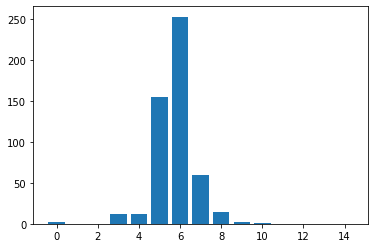

In [19]:
plt.bar(rules.keys(), rules.values())

In [20]:
rules2 = set()
for _ in range(100000):
    #rule = grammar.generate()
    #log_prob = grammar.log_probability(rule)
    rule2 = LOTHypothesis(grammar=grammar)
    rules2.add(rule2)

In [21]:
rarr = list(rules2)

In [25]:
ra = sample(rarr, 100)

In [59]:
with open('../data/lotlib_tune.json', 'w') as out:
    da = []
    for rule in ra:
    
        for _ in range(3):
            num_stimuli = randrange(1, 15)
            stims = choices(all_stimuli, k=num_stimuli)
            results = apply_rule(rule, stims)
            prompt = "Create a function that takes in each item in " + str(stims) + " and returns the corresponding item in " + str(results)
            data = {}
            data["code"] = str(rule)
            data["n1"] = prompt
            da.append(data)
            #json.dump(data, out)
    out.write(json.dumps(da))
out.close()

In [60]:
f = json.load(open("../data/lotlib_tune.json"))

In [61]:
f

[{'code': "lambda x: (x['shape']=='triangle' or (not (x['shape']=='circle') or x['color']=='red'))",
  'n1': "Create a function that takes in each item in [{'shape': 'circle', 'color': 'red'}, {'shape': 'circle', 'color': 'blue'}, {'shape': 'circle', 'color': 'red'}, {'shape': 'square', 'color': 'blue'}, {'shape': 'circle', 'color': 'red'}, {'shape': 'triangle', 'color': 'green'}, {'shape': 'circle', 'color': 'green'}, {'shape': 'circle', 'color': 'red'}, {'shape': 'circle', 'color': 'red'}, {'shape': 'square', 'color': 'green'}, {'shape': 'triangle', 'color': 'blue'}, {'shape': 'circle', 'color': 'blue'}] and returns the corresponding item in [True, False, True, True, True, True, False, True, True, True, True, False]"},
 {'code': "lambda x: (x['shape']=='triangle' or (not (x['shape']=='circle') or x['color']=='red'))",
  'n1': "Create a function that takes in each item in [{'shape': 'square', 'color': 'red'}, {'shape': 'triangle', 'color': 'blue'}, {'shape': 'square', 'color': 'blue'}

In [62]:
data = f[0]

In [63]:
data

{'code': "lambda x: (x['shape']=='triangle' or (not (x['shape']=='circle') or x['color']=='red'))",
 'n1': "Create a function that takes in each item in [{'shape': 'circle', 'color': 'red'}, {'shape': 'circle', 'color': 'blue'}, {'shape': 'circle', 'color': 'red'}, {'shape': 'square', 'color': 'blue'}, {'shape': 'circle', 'color': 'red'}, {'shape': 'triangle', 'color': 'green'}, {'shape': 'circle', 'color': 'green'}, {'shape': 'circle', 'color': 'red'}, {'shape': 'circle', 'color': 'red'}, {'shape': 'square', 'color': 'green'}, {'shape': 'triangle', 'color': 'blue'}, {'shape': 'circle', 'color': 'blue'}] and returns the corresponding item in [True, False, True, True, True, True, False, True, True, True, True, False]"}